# Analiza Bivariată

Analiza bivariată studiază relația dintre două variabile. În proiectul nostru, acest pas arată dacă legăturile teoretice dintre **Economie, Instituții și Sistemul Energetic** apar în date.

#### 1. Corelații (variabile numerice)
Corelația măsoară **direcția** și **forța** relației dintre două variabile continue.  
Coeficienți utilizați:
- **Pearson** – relații liniare  
- **Spearman** – relații monotone, robuste la outlieri  
Aplicație în proiect:
- *gdp_per_capita ↔ renewables_generation* → țările bogate investesc mai mult în regenerabile?
- *gov_effectiveness ↔ co2_emissions_emissions* → instituțiile influențează emisiile?
- *coal_generation ↔ co2_pc* → dependența de cărbune explică variațiile în emisii?
Instrumente:
- **scatterplot + linie de regresie**  
- **matrice de corelație (heatmap)**  
Corelațiile sunt cele care ne permit să testăm ipotezele teoretice despre tranziția energetică.
#### 2. Asocieri (variabile categorice)
Asocierea se referă la **relația dintre două variabile categoriale**.  
- **Chi-square (χ²)** – test de independență  
- **Cramér’s V** – măsoară forța asocierii (0–1)
În datele noastre avem o variabilă categorială majoră:
- **regiunea geografică** (Africa, Europa, Asia etc.), putem crea si altele (ex: categorii de venit)
Pentru a analiza asocieri în sens strict, una dintre variabile trebuie **discretizată**.  
Exemplu:
- clasificăm `co2_pc` în *low / medium / high*  
- analizăm *regiune × categorie_CO₂* prin χ² și Cramér’s V
Asta răspunde întrebărilor:
- „Regiunile diferă sistematic în intensitatea emisiilor?”  
- „Există modele geografice ale mixului energetic?”

#### 3. Compararea grupurilor (categorical → numeric)
Când avem o variabilă categorială și una numerică, nu putem vorbi despre „asociere” în sens χ².  
Aici analizăm **diferențe între grupuri**:
- *regiune → coal_generation*  
- *regiune → co2_pc*  
- *regiune → renewables_generation*
Instrumente:
- teste de diferență (ANOVA)  
- compararea distribuțiilor între categorii

Aceste analize arată, de exemplu:
- dacă Africa depinde disproporționat de combustibili fosili  
- dacă regiunile cu venituri mici au acces redus la electricitate

#### 4. Corelație vs. Asociere — sinteză
| Situație | Metodă | Exemplu în proiect |
|---------|--------|--------------------|
| numeric–numeric | Pearson / Spearman | GDP ↔ regenerabile |
| categorial–numeric | ANOVA / comparare medii | Regiune → CO₂ per capita |
| categorial–categorical | Chi-square, Cramér’s V | Regiune × categorie CO₂ |


#### Cuprins
- 1.Numeric → Numeric (Corelații și scatterplots)
- 2.Transformarea variabilelor numerice în categorii (Jenks)
- 3.Categoric → Categoric (Asocieri, χ², Cramér’s V)
- 4.Categorial → Numeric (diferențe între grupuri)
- 5.Rezumat al constatărilor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
sns.set(style="whitegrid")



# Feature engineering

In [2]:
df = pd.read_csv("../data/all_energy_data.csv")

df["coal_share"] = df["coal_generation"] / df["electricity_generation"]
df["renewables_share"] = df["renewables_generation"] / df["electricity_generation"]
df["gas_share"] = df["natural_gas_generation"] / df["electricity_generation"]
df["oil_share"] = df["oil_generation"] / df["electricity_generation"]

# Share-urile pot avea inf sau NaN dacă electricitatea e 0 → le curățăm
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# CO2 per capita
# co2_emissions_emissions = milioane tone → transformăm în tone

df["co2_pc"] = (df["co2_emissions_emissions"] * 1e6) / df["population_total"]

# Intensități energetice (opțional, utile la interpretare)

df["energy_intensity"] = df["primary_energy_consumption"] / df["gdp_per_capita"]
df["carbon_intensity"] = df["co2_emissions_emissions"] / df["primary_energy_consumption"]


df2023 = df[df["year"] == 2023].copy()

# 1. Numeric → Numeric (Corelații și scatterplots)

Explorăm relații directe între variabile continue. Aceste grafice răspund la întrebări precum:
- Țările cu PIB ridicat au emisii mai mici?
- Instituțiile bune sunt asociate cu mai multe regenerabile?
- Ponderea cărbunelui determină CO₂ per capita?

Vizualizări folosite:
- scatterplot (cu opțiune log-scale)
- heatmap de corelații (matricea de corelatii)

#### Matrice de corelatie

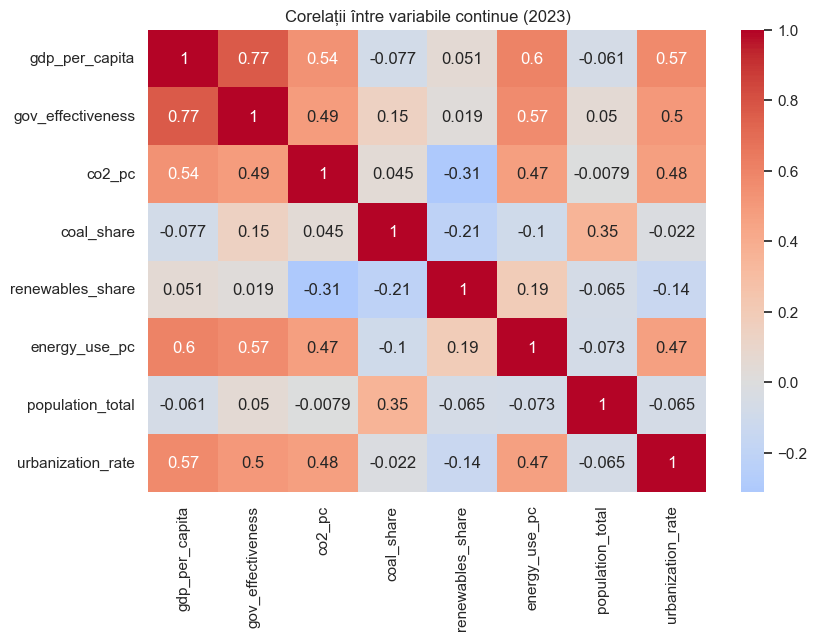

In [3]:
num_vars = [
    "gdp_per_capita", "gov_effectiveness", "co2_pc",
    "coal_share", "renewables_share",
    "energy_use_pc", "population_total", "urbanization_rate"
]

corr = df2023[num_vars].corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Corelații între variabile continue (2023)")
plt.show()


Corelațiile arată că în 2023 diferențele între țări sunt dominate de dezvoltarea economică, urbanizare și calitatea instituțiilor. Mixul energetic explică variații în emisii doar moderat, deoarece poziția unei țări în tranziția energetică este suprapusă peste niveluri foarte diferite de consum total.”

### Scatterplots

c:\PROJECTS\AID\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


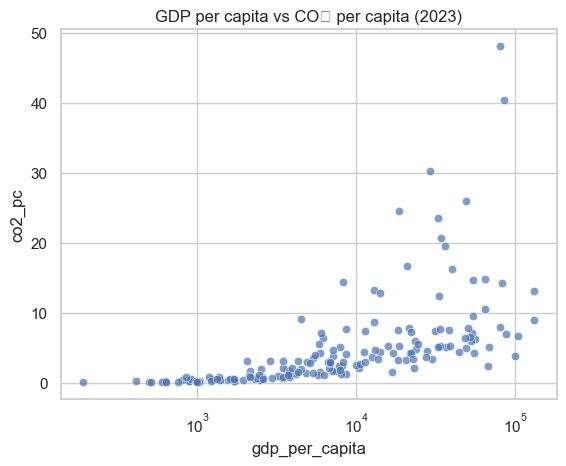

In [4]:
# întrebarea teoretică: economiile bogate emit mai puțin?
sns.scatterplot(
    data=df2023,
    x="gdp_per_capita",
    y="co2_pc",
    alpha=0.7
)
plt.xscale("log")
plt.title("GDP per capita vs CO₂ per capita (2023)")
plt.show()

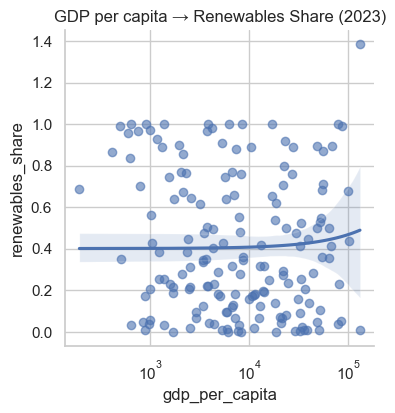

In [5]:
# Scatter + regresie: PIB → Regenerabile
# întrebarea: PIB mare → regenerabile mai multe?
sns.lmplot(
    data=df2023,
    x="gdp_per_capita",
    y="renewables_share",
    scatter_kws={"alpha":0.6},
    height=4
)
plt.xscale("log")
plt.title("GDP per capita → Renewables Share (2023)")
plt.show()

c:\PROJECTS\AID\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


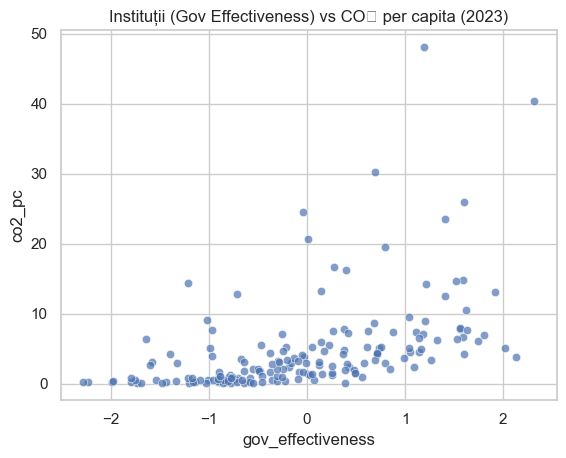

In [6]:
# Instituții → Emisii CO2
sns.scatterplot(
    data=df2023,
    x="gov_effectiveness",
    y="co2_pc",
    alpha=0.7
)
plt.title("Instituții (Gov Effectiveness) vs CO₂ per capita (2023)")
plt.show()

Scatterploturile arată că PIB-ul ridicat este asociat cu emisii CO₂ per capita mai mari, ceea ce reflectă consum energetic intens și stiluri de viață cu amprentă ridicată. În schimb, relația dintre PIB și ponderea regenerabilelor este foarte slabă: țările bogate pot avea atât mixuri foarte curate, cât și foarte poluante. Acest lucru sugerează că tranziția energetică depinde de structura sistemului energetic și de instituții, nu doar de dezvoltare economică

### Corelatii

In [7]:
df.columns

Index(['Unnamed: 0', 'country', 'year', 'co2_emissions_emissions',
       'coal_generation', 'control_corruption', 'electricity_access',
       'electricity_capacity', 'electricity_generation', 'energy_use_pc',
       'gdp_per_capita', 'gov_effectiveness', 'natural_gas_generation',
       'oil_generation', 'population_total', 'primary_energy_consumption',
       'primary_energy_production', 'reg_quality', 'renewables_capacity',
       'renewables_generation', 'rule_of_law', 'urbanization_rate',
       'n_missing', 'region_geographic', 'subregion_geographic', 'co2_pc',
       'coal_share', 'renewables_share', 'gas_share', 'oil_share',
       'energy_intensity', 'carbon_intensity'],
      dtype='object')

                       gdp_per_capita  renewables_generation    co2_pc  \
gdp_per_capita               1.000000               0.126017  0.592716   
renewables_generation        0.126017               1.000000  0.086004   
co2_pc                       0.592716               0.086004  1.000000   
oil_generation               0.085524               0.140800  0.184936   
rule_of_law                  0.735555               0.117799  0.479915   

                       oil_generation  rule_of_law  
gdp_per_capita               0.085524     0.735555  
renewables_generation        0.140800     0.117799  
co2_pc                       0.184936     0.479915  
oil_generation               1.000000     0.046253  
rule_of_law                  0.046253     1.000000  


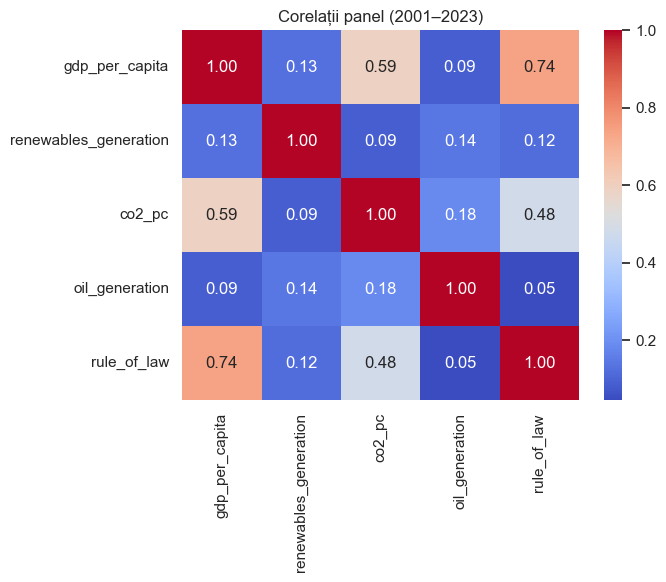

In [8]:
panel_corr = df[["gdp_per_capita", "renewables_generation", "co2_pc","oil_generation","rule_of_law"]].corr()
print(panel_corr)

sns.heatmap(panel_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corelații panel (2001–2023)")
plt.show()

In [9]:
from scipy.stats import pearsonr

x = df["gdp_per_capita"]
y = df["co2_pc"]

mask = (~x.isna()) & (~y.isna())
r, p = pearsonr(x[mask], y[mask])

print("Coeficient Pearson r:", r)
print("p-value:", p)


Coeficient Pearson r: 0.5927156434137069
p-value: 0.0


Țările bogate investesc puțin mai mult în regenerabile, dar legătura este slabă — diferențele regionale și de resurse domină relația.

In [10]:
x = df["renewables_generation"]
y = df["co2_pc"]

mask = (~x.isna()) & (~y.isna())
r, p = pearsonr(x[mask], y[mask])

print("Coeficient Pearson r:", r)
print("p-value:", p)


Coeficient Pearson r: 0.08600427303860603
p-value: 5.5273060325754016e-08


Între producția din regenerabile și CO₂ per capita există o corelație foarte slabă (r ≈ 0.09), deși semnificativă statistic datorită numărului mare de observații. În termeni substanțiali, regenerabilele nu reduc încă vizibil emisiile, pentru că sunt suprapuse peste un consum total foarte ridicat.

## 2.Transformarea variabilelor numerice în categorii (Jenks)

Pentru a analiza asocieri categorice → categorice, trebuie să discretizăm variabilele numerice.
Categorii create automat (low / medium / high):
- PIB per capita
- guvernanță
- coal share
- renewables share
- gas share
- oil share
- CO₂ per capita
Aceste categorii sunt necesare pentru:
- tabele de contingență
- heatmap-uri interpretabile
- teste χ² și Cramér’s V

In [11]:
import jenkspy


def jenks_classify(df, col, labels=None, n_classes=3):
    """
    Creează categorii (low/mid/high) pentru o variabilă numerică folosind Jenks.
    
    df      : DataFrame-ul
    col     : numele coloanei numeric
    labels  : liste de etichete (default = ['low','mid','high'])
    n_classes : număr de categorii
    """
    if labels is None:
        labels = ["low", "mid", "high"]

    values = df[col].dropna().values

    # dacă variabila nu are destule valori unice → o sărim
    if len(np.unique(values)) < n_classes:
        print(f"⚠ Variabila {col} nu are destule valori unice pentru Jenks.")
        df[col + "_cat"] = np.nan
        return df

    breaks = jenkspy.jenks_breaks(values, n_classes=n_classes)

    df[col + "_cat"] = pd.cut(
        df[col],
        bins=breaks,
        labels=labels,
        include_lowest=True
    )

    print(f"{col} → breaks: {breaks}")
    return df


### Aplicăm discretizarea pe df2023

In [12]:
vars_to_cat = [
    "gdp_per_capita",
    "gov_effectiveness",
    "coal_share",
    "renewables_share",
    "gas_share",
    "oil_share",
    "co2_pc"
]

for col in vars_to_cat:
    df2023 = jenks_classify(df2023, col)


gdp_per_capita → breaks: [np.float64(192.074305359351), np.float64(24673.5482979144), np.float64(68453.8769281145), np.float64(132604.439086216)]
gov_effectiveness → breaks: [np.float64(-2.27542042732239), np.float64(-0.546764314174652), np.float64(0.624744176864624), np.float64(2.31747198104858)]
coal_share → breaks: [np.float64(0.0), np.float64(0.13083896859926175), np.float64(0.3992048904087897), np.float64(0.9591270414515121)]
renewables_share → breaks: [np.float64(0.0), np.float64(0.2814990528921385), np.float64(0.6596582783618422), np.float64(1.3837594290844468)]
gas_share → breaks: [np.float64(0.0), np.float64(0.17920544613552644), np.float64(0.5323490072568186), np.float64(0.9998224021222947)]
oil_share → breaks: [np.float64(0.0), np.float64(0.21588636084153826), np.float64(0.596996166656193), np.float64(1.0)]
co2_pc → breaks: [np.float64(0.055611172269641185), np.float64(5.544230530299959), np.float64(19.479448474220085), np.float64(48.11036867251599)]


In [13]:
#redenumim pentru claritate
df2023.rename(columns={
    "gdp_per_capita_cat": "gdp_cat",
    "gov_effectiveness_cat": "gov_cat"
}, inplace=True)


In [14]:
df2023.columns

Index(['Unnamed: 0', 'country', 'year', 'co2_emissions_emissions',
       'coal_generation', 'control_corruption', 'electricity_access',
       'electricity_capacity', 'electricity_generation', 'energy_use_pc',
       'gdp_per_capita', 'gov_effectiveness', 'natural_gas_generation',
       'oil_generation', 'population_total', 'primary_energy_consumption',
       'primary_energy_production', 'reg_quality', 'renewables_capacity',
       'renewables_generation', 'rule_of_law', 'urbanization_rate',
       'n_missing', 'region_geographic', 'subregion_geographic', 'co2_pc',
       'coal_share', 'renewables_share', 'gas_share', 'oil_share',
       'energy_intensity', 'carbon_intensity', 'gdp_cat', 'gov_cat',
       'coal_share_cat', 'renewables_share_cat', 'gas_share_cat',
       'oil_share_cat', 'co2_pc_cat'],
      dtype='object')

In [15]:
df

,Unnamed: 0,country,year,co2_emissions_emissions,coal_generation,control_corruption,electricity_access,electricity_capacity,electricity_generation,energy_use_pc,...,n_missing,region_geographic,subregion_geographic,co2_pc,coal_share,renewables_share,gas_share,oil_share,energy_intensity,carbon_intensity
0,0,AFG,2001,0.848627,0.0426,NaN,9.3,0.306500,0.685900,NaN,...,5,Asia,Southern Asia,0.041837,0.062108,0.726053,0.0,0.211838,0.002262,2.704736
1,1,AFG,2002,0.838908,0.0423,-1.251137,14.1,0.306500,0.706200,NaN,...,1,Asia,Southern Asia,0.039241,0.059898,0.785896,0.0,0.154206,0.001599,2.931222
2,2,AFG,2003,0.707269,0.0880,-1.344180,19.0,0.306600,0.904000,NaN,...,1,Asia,Southern Asia,0.031112,0.097345,0.696903,0.0,0.205752,0.001716,2.072845
3,3,AFG,2004,0.705325,0.0610,-1.350647,23.8,0.306700,0.797000,NaN,...,1,Asia,Southern Asia,0.029937,0.076537,0.708908,0.0,0.214555,0.001441,2.206945
4,4,AFG,2005,0.803381,0.0610,-1.447252,28.7,0.307600,0.825000,NaN,...,1,Asia,Southern Asia,0.032919,0.073939,0.715152,0.0,0.210909,0.001696,1.863312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3974,ZWE,2019,9.511752,4.0460,-1.290334,46.7,2.457900,8.467800,412.165420,...,0,Africa,Sub-Saharan Africa,0.622849,0.477810,0.516297,0.0,0.005893,0.002030,2.781896
3975,3975,ZWE,2020,7.687652,2.7445,-1.308788,52.7,2.460200,6.711800,373.557246,...,0,Africa,Sub-Saharan Africa,0.495119,0.408907,0.585253,0.0,0.005840,0.001669,2.662066
3976,3976,ZWE,2021,8.108755,2.5080,-1.277147,49.0,2.479055,8.564000,405.518564,...,0,Africa,Sub-Saharan Africa,0.513303,0.292854,0.707146,0.0,0.000000,0.001877,2.505719
3977,3977,ZWE,2022,14.380704,2.9220,-1.259969,50.1,2.492055,8.945000,416.586875,...,0,Africa,Sub-Saharan Africa,0.894931,0.326663,0.673337,0.0,0.000000,0.002460,2.864810


In [16]:

df2023[vars_to_cat].head()


,gdp_per_capita,gov_effectiveness,coal_share,renewables_share,gas_share,oil_share,co2_pc
22,413.757895,-1.987014,0.028483,0.866969,0.000000,0.104549,0.187115
45,2309.534130,-1.008910,0.000000,0.764323,0.092846,0.142830,0.534964
68,8575.171346,0.250855,0.000000,1.000000,0.000000,0.000000,1.235414
91,49040.694752,1.604282,0.001663,0.048229,0.745787,0.005145,25.916550
114,14187.482725,-0.377517,0.006169,0.318123,0.506770,0.099292,4.351081


In [17]:
# simetria distributiilor
df2023["coal_share_cat"].value_counts()
df2023["renewables_share_cat"].value_counts()
df2023["gdp_cat"].value_counts()
df2023["gov_cat"].value_counts()


gov_cat
mid     67
low     61
high    45
Name: count, dtype: int64

# 3. Categoric → Categoric (Asocieri, χ², Cramér’s V)

Aici verificăm relații între categorii 
Întrebări tratate aici:
- Țările bogate au pondere mai mică a cărbunelui în mix?
- Instituțiile puternice sunt asociate cu regenerabile mai multe?
- Mixul energetic influențează niveluri discrete de CO₂?
- Există tipologii regionale clare ale mixului energetic?
Instrumente:
- pd.crosstab (cu normalizare)
- heatmap pentru vizualizare intuitivă
- χ² pentru testul statistic
- Cramér’s V pentru intensitatea relației

## χ² si Cramér’s V 

χ² (hi-pătrat): testează dacă cele două variabile sunt asociate.
- p < 0.05 → există asociere.

Cramér’s V: măsoară forța asocierii (0–1).
- 0 = fără legătură, 0.1 = slabă, 0.3 = medie, 0.5+ = puternică.

In [18]:
# Funcție pentru Cramér’s V
from scipy.stats import chi2_contingency

def cramers_v(ct):
    chi2, p, dof, expected = chi2_contingency(ct)
    n = ct.sum().sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k - 1))), p

In [19]:
# Economie × Sistem Energetic
ct = pd.crosstab(df2023["gdp_cat"], df2023["coal_share_cat"])
# chi-square
chi2, p, dof, expected = chi2_contingency(ct)
# Cramér’s V
cr_v, _ = cramers_v(ct)
print(ct)
print("\nChi-square:", chi2)
print("p-value:", p)
print("Cramér’s V:", cr_v)



coal_share_cat  low  mid  high
gdp_cat                       
low              97   17    13
mid              23    8     1
high              8    1     0

Chi-square: 4.957625507899253
p-value: 0.29167308348034016
Cramér’s V: 0.12146949337643888


(cr_v, p) = cramers_v(ct_gdp_coal) echivalent cu 
 
result = cramers_v(ct)
cr_v = result[0]
p = result[1]

Testul χ² nu este semnificativ (p = 0.29), ceea ce indică faptul că ponderea cărbunelui nu diferă sistematic între țările cu PIB scăzut, mediu și ridicat. Cramér’s V = 0.12 arată o asociere foarte slabă. Distribuțiile pe rânduri sunt similare, deci PIB-ul nu explică mixul pe cărbune în 2023.


In [20]:
# Instituții × Regenerabile
ct = pd.crosstab(df2023["gov_cat"], df2023["renewables_share_cat"])
# chi-square
chi2, p, dof, expected = chi2_contingency(ct)
# Cramér’s V
cr_v, _ = cramers_v(ct)

print(ct)
print("\nChi-square:", chi2)
print("p-value:", p)
print("Cramér’s V:", cr_v)


renewables_share_cat  low  mid  high
gov_cat                             
low                    24   14    23
mid                    39   19     9
high                   17   13    15

Chi-square: 11.646817724362524
p-value: 0.020180274087029045
Cramér’s V: 0.18347022347722222


Testul χ² este semnificativ (p = 0.02), ceea ce indică faptul că distribuția ponderii regenerabilelor diferă între țările cu instituții slabe, medii și puternice. Cramér’s V = 0.18 arată o asociere slabă spre moderată. Țările cu guvernanță mai bună tind să aibă o pondere ceva mai ridicată a regenerabilelor, dar relația nu este foarte puternică.


In [21]:
# Mix Energetic × CO₂
ct = pd.crosstab(df2023["coal_share_cat"], df2023["co2_pc_cat"])
# chi-square
chi2, p, dof, expected = chi2_contingency(ct)
# Cramér’s V
cr_v, _ = cramers_v(ct)
print(ct)
print("\nChi-square:", chi2)
print("p-value:", p)
print("Cramér’s V:", cr_v)


co2_pc_cat      low  mid  high
coal_share_cat                
low             106   21     6
mid              17    8     1
high              7    7     0

Chi-square: 11.097535028752496
p-value: 0.02548944973841171
Cramér’s V: 0.17909159852191386


Testul χ² este semnificativ (p = 0.03), ceea ce arată că distribuția ponderii cărbunelui diferă între regiuni. Cramér’s V = 0.22 indică o asociere de intensitate moderată. Asia are cele mai multe țări în categoriile „mid” și „high coal”, în timp ce Africa, Europa și Americile sunt dominate de categoria „low coal”. Rezultatul sugerează existența unor tipologii regionale distincte ale mixului energetic.

In [22]:
# Regiune × Sistem Energetic
ct = pd.crosstab(df2023["region_geographic"], df2023["coal_share_cat"])
# chi-square
chi2, p, dof, expected = chi2_contingency(ct)
# Cramér’s V
cr_v, _ = cramers_v(ct)
print(ct)
print("\nChi-square:", chi2)
print("p-value:", p)
print("Cramér’s V:", cr_v)


coal_share_cat     low  mid  high
region_geographic                
Africa              44    4     3
Americas            29    4     0
Asia                29   11     8
Europe              28    7     2
Oceania              3    0     1

Chi-square: 16.786584069188557
p-value: 0.03240969349323018
Cramér’s V: 0.22026379395690665


Asocierea dintre regiunea geografică și ponderea cărbunelui în mixul energetic este semnificativă statistic (p < 0.05), dar slabă ca intensitate (V = 0.22).
Tabelul arată că Africa și Asia au mai frecvent categorii mid și high coal, în timp ce Americile și Europa apar mai des în categoria low coal.

### Vizualizări Categoric → Categoric (crosstab + heatmap)

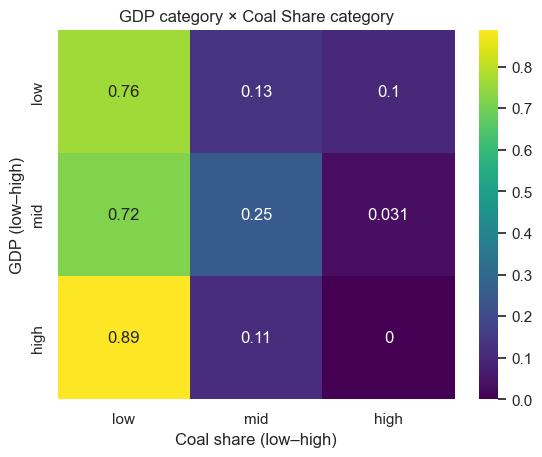

In [23]:
ct_gdp_coal = pd.crosstab(
    df2023["gdp_cat"],
    df2023["coal_share_cat"],
    normalize="index"
)

sns.heatmap(ct_gdp_coal, annot=True, cmap="viridis")
plt.title("GDP category × Coal Share category")
plt.xlabel("Coal share (low–high)")
plt.ylabel("GDP (low–high)")
plt.show()


Tările cu venituri mari (high GDP) apar aproape exclusiv în categoria low coal share, iar țările cu venituri mici (low GDP) au o probabilitate mai mare să rămână în mid sau high coal share.

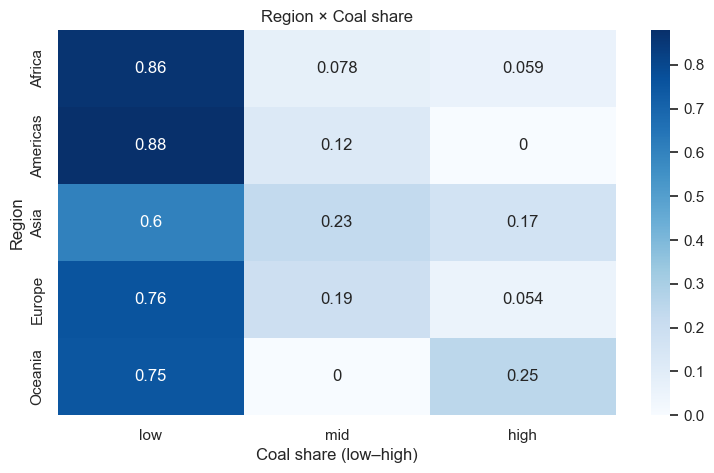

In [24]:
# Există tipologii regionale clare ale mixului energetic
ct_region_coal = pd.crosstab(
    df2023["region_geographic"],
    df2023["coal_share_cat"],
    normalize="index"
)

plt.figure(figsize=(9,5))
sns.heatmap(ct_region_coal, annot=True, cmap="Blues")
plt.title("Region × Coal share")
plt.xlabel("Coal share (low–high)")
plt.ylabel("Region")
plt.show()

- Africa și Americile: aproape toate țările sunt în low coal share → dependență redusă de cărbune.
- Asia: cea mai diversă, dar cu cea mai mare pondere în mid și high coal → regiunea cu cel mai puternic lock-in pe cărbune.
- Europa: predominant low coal, cu un mic nucleu mid.
- Oceania: distribuție polarizată — țări fie foarte joase, fie foarte ridicate la cărbune.

### Heatmap cu reziduurile Pearson

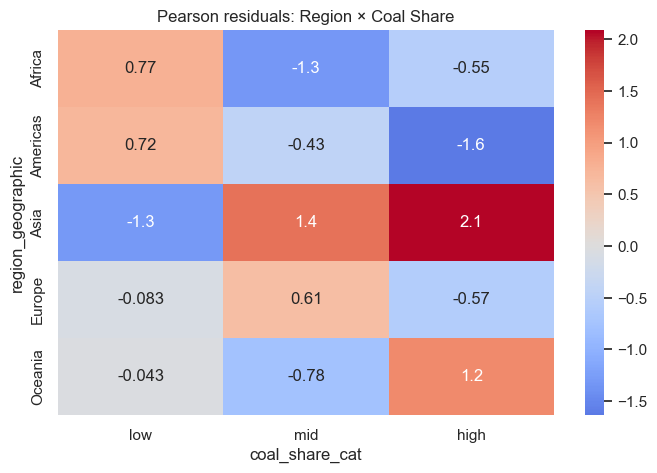

In [25]:
ct = pd.crosstab(df2023["region_geographic"], df2023["coal_share_cat"])
chi2, p, dof, expected = chi2_contingency(ct)

residuals = (ct - expected) / np.sqrt(expected)

plt.figure(figsize=(8,5))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson residuals: Region × Coal Share")
plt.show()


- Asia are mult mai multe țări cu high coal decât ar fi normal → tipar clar.
- Americile au mult mai puține țări high coal → mix energetic diferit.
- Africa este subreprezentată în mid coal.
- Europa are valori apropiate de independență (reziduuri aproape 0)

# 4.Categorial → Numeric (diferențe între grupuri)
- Comparăm regiuni, subregiuni și categorii socio-economice în termeni de CO₂, PIB, coal share etc.
- Instrumente: boxplot, violins, Kruskal–Wallis., Anova

### Kruskal–Wallis.

Folosim Kruskal–Wallis ca o versiune non-parametrică a ANOVA, care testează dacă medianele CO₂ per capita sunt diferite între regiuni, fără să presupunem distribuții normale

In [26]:
#%pip install pingouin

In [27]:
import pingouin as pg

pg.kruskal(data=df2023, dv="co2_pc", between="region_geographic")


,Source,ddof1,H,p-unc
Kruskal,region_geographic,4,69.838322,2.455429e-14


In [28]:
pg.kruskal(data=df2023, dv="co2_pc", between="subregion_geographic")


,Source,ddof1,H,p-unc
Kruskal,subregion_geographic,15,92.686745,3.119374e-13


c:\PROJECTS\AID\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\alexe\AppData\Local\Temp\ipykernel_23324\1907510069.py:27: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\PROJECTS\AID\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


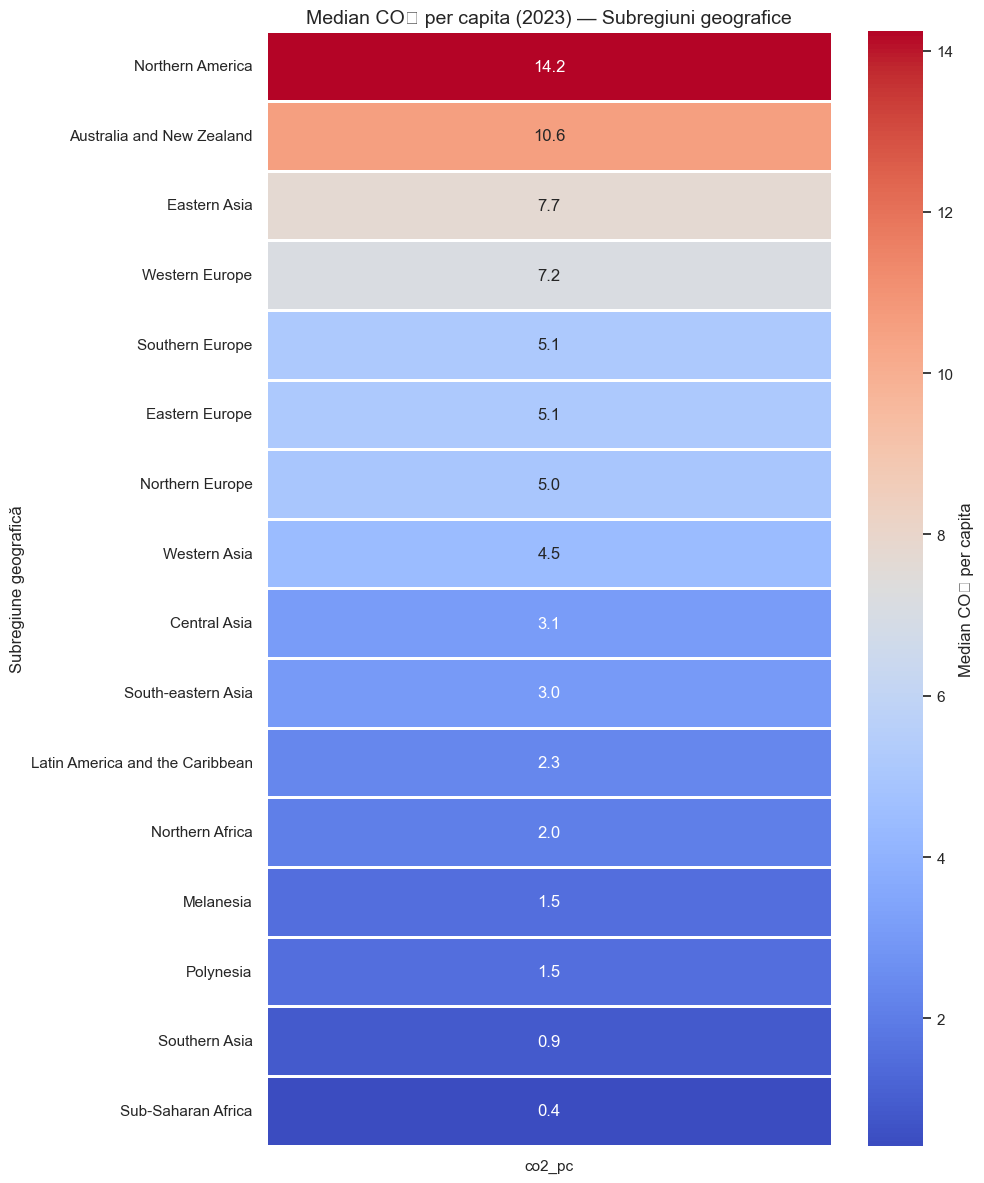

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# sortăm descrescător: emisii mari sus
median_co2 = (
    df2023.groupby("subregion_geographic")["co2_pc"]
    .median()
    .sort_values(ascending=False)   # ← AICI este diferența
    .to_frame()
)

plt.figure(figsize=(10, 12))

sns.heatmap(
    median_co2,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",  # roșu sus, albastru jos
    linewidths=1,
    linecolor="white",
    cbar_kws={"label": "Median CO₂ per capita"},
)

plt.title("Median CO₂ per capita (2023) — Subregiuni geografice", fontsize=14)
plt.xlabel("")
plt.ylabel("Subregiune geografică")
plt.tight_layout()
plt.show()


c:\PROJECTS\AID\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


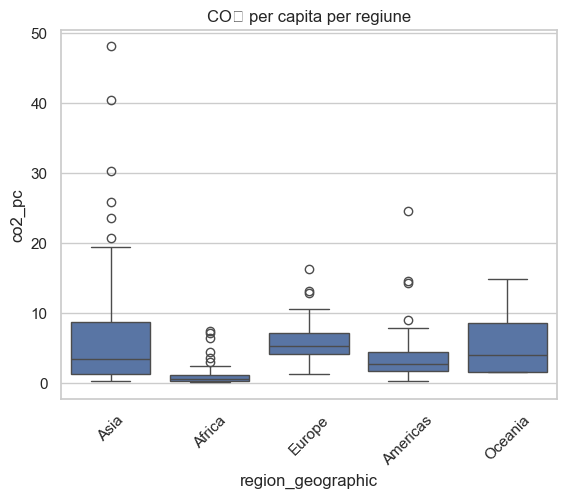

In [30]:
sns.boxplot(data=df2023, x="region_geographic", y="co2_pc")
plt.xticks(rotation=45)
plt.title("CO₂ per capita per regiune")
plt.show()



Testul Kruskal–Wallis verifică dacă mai multe grupuri (regiunile lumii) au **aceeași distribuție** a unei variabile numerice (CO₂ per capita). Este un test **non-parametric**, potrivit pentru date ne-normale și cu outlieri, ca în cazul CO₂.

- **H = 69.84** → statistică mare, indică diferențe clare între grupuri.  
- **p = 2.45 × 10⁻¹⁴** → practic zero; probabilitatea ca diferențele să fie întâmplătoare este extrem de mică.  
- **ddof = 4** → cinci regiuni analizate (df = 5–1).
  
Regiunile lumii diferă semnificativ în nivelurile de CO₂ per capita. Asta înseamnă că **geografia și structura economic-energetică regională au efect real asupra emisiilor**, în linie cu teoria tranzițiilor energetice: unele regiuni sunt dependente de combustibili fosili (CO₂ ridicat), altele sunt mai eficiente sau mai puțin industrializate (CO₂ redus).

## Anova

In [31]:
pg.anova(data=df2023, dv="co2_pc", between="region_geographic")


,Source,ddof1,ddof2,F,p-unc,np2
0,region_geographic,4,168,7.761545,0.000009,0.155975


- F = 7.76 este  peste ce am vedea dacă toate regiunile ar avea aceeași distribuție.
- p < 0.001 → diferențele sunt statistic semnificative.
- η²p ≈ 0.16 → partial eta-squared (mărimea efectului), mărime de efect mare: aproximativ 16% din variația CO₂ per capita se datorează diferențelor între regiuni.
Concluzie: Regiunile au niveluri distincte de CO₂ per capita — geografia energetică organizează clar emisiile.

### Instituții → Renewables share

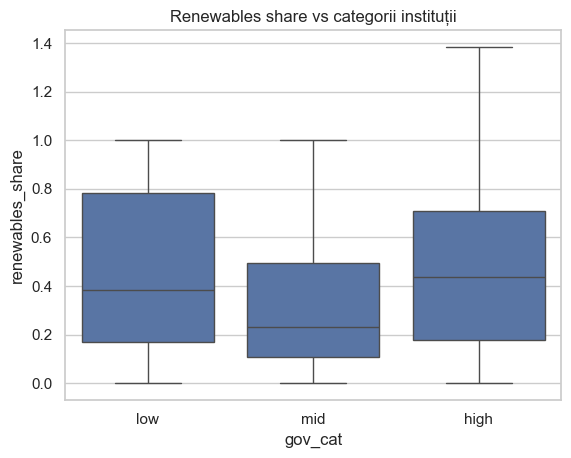

In [32]:
sns.boxplot(data=df2023, x="gov_cat", y="renewables_share")
plt.title("Renewables share vs categorii instituții")
plt.show()


In [33]:
pg.kruskal(data=df2023, dv="renewables_share", between="gov_cat")


,Source,ddof1,H,p-unc
Kruskal,gov_cat,2,4.413514,0.110057


Rezultat: H = 4.41, df = 2, p = 0.11.
Interpretare: Nu există diferențe semnificative statistic între nivelurile calității instituțiilor în ceea ce privește ponderea regenerabilelor. Distribuțiile celor trei grupuri sunt similare — instituțiile, în 2023, nu separă clar țările după nivelul regenerabilelor.

### Coal Share categories → Energy intensity

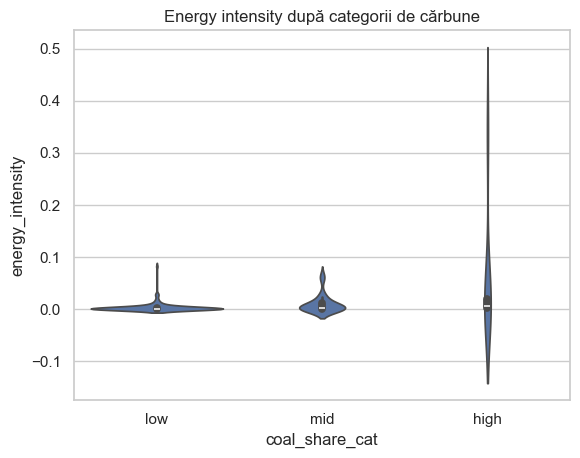

,Source,ddof1,H,p-unc
Kruskal,coal_share_cat,2,17.861275,0.000132


In [34]:
sns.violinplot(data=df2023, x="coal_share_cat", y="energy_intensity")
plt.title("Energy intensity după categorii de cărbune")
plt.show()

pg.kruskal(data=df2023, dv="energy_intensity", between="coal_share_cat")


- La low: - vioara e foarte îngusta și concentrat aproape de 0 → țările cu pondere mică a cărbunelui au energy_intensity mică și foarte omogenă.
- La mid: - distribuția tot în jur de 0, puțin mai lată → energy_intensity e tot relativ mică, dar cu variație ceva mai mare decât la low.
- La high: - violin mult mai lung și mai lat, cu valori care urcă mult mai sus → țările cu pondere mare de cărbune au intensitate energetică mai mare și mult mai variabilă (unele foarte ineficiente).

Testul arată că cele trei grupuri (low, mid, high coal share) au distribuții semnificativ diferite de intensitate energetică. Asta întărește vizualul: țările cu pondere mare a cărbunelui au intensități energetice mai mari.

In [38]:
df.columns

Index(['country', 'year', 'co2_emissions_emissions', 'coal_generation',
       'control_corruption', 'electricity_access', 'electricity_capacity',
       'electricity_generation', 'energy_use_pc', 'gdp_per_capita',
       'gov_effectiveness', 'natural_gas_generation', 'oil_generation',
       'population_total', 'primary_energy_consumption',
       'primary_energy_production', 'reg_quality', 'renewables_capacity',
       'renewables_generation', 'rule_of_law', 'urbanization_rate',
       'n_missing', 'region_geographic', 'subregion_geographic', 'co2_pc',
       'coal_share', 'renewables_share', 'gas_share', 'oil_share',
       'energy_intensity', 'carbon_intensity'],
      dtype='object')